In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import networkx as nx
from community import best_partition  
from cdlib import algorithms
from sklearn.cluster import SpectralClustering
import igraph as ig
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation

In [54]:
years=[i for i in range(2000,2025)]

In [55]:
cpu_linear_corr=[]
gpu_linear_corr=[]

In [56]:
cpu_dynamic_corr=[]
gpu_dynamic_corr=[]

In [57]:
cpu_returns=[]
gpu_returns=[]

In [58]:
for i in years:
    cpu_linear_corr_dataset=pd.read_csv(os.path.join(os.getcwd(),'cpu_linear',f'linear_data_corr_cpu_{i}.csv'),index_col='ticker')
    cpu_linear_corr.append(cpu_linear_corr_dataset)

    gpu_linear_corr_dataset=pd.read_csv(os.path.join(os.getcwd(),'gpu_linear',f'linear_data_corr_gpu_{i}.csv'),index_col='ticker')
    gpu_linear_corr.append(gpu_linear_corr_dataset)

    cpu_dynamic_corr_dataset=pd.read_csv(os.path.join(os.getcwd(),'cpu_dynamic',f'cpu_dynamic_data_corr_{i}.csv'),index_col='ticker')
    cpu_dynamic_corr.append(cpu_dynamic_corr_dataset)

    gpu_dynamic_corr_dataset=pd.read_csv(os.path.join(os.getcwd(),'gpu_dynamic',f'gpu_dynamic_data_corr_{i}.csv'),index_col='ticker')
    gpu_dynamic_corr.append(gpu_dynamic_corr_dataset)


In [59]:
for i in years:
    cpu_returns_dataset=pd.read_csv(os.path.join(os.getcwd(),'cpu_returns',f'cpu_returns_{i}.csv'),index_col='ticker')
    cpu_returns.append(cpu_returns_dataset)

In [63]:
len(cpu_returns)

25

In [60]:
cpu_returns[0]

,A,AA,AAME,AAON,AAPL,AB,ABCB,ABEO,ABEV,ABM,...,XOMA,XRAY,XRX,YORW,YPF,YUM,ZBRA,ZD,ZEUS,ZION
ticker,,,,,,,,,,,,,,,,,,,,,
0,-0.076389,0.004633,0.027027,0.041667,-0.084310,-0.004201,-0.011628,-0.071429,0.000000,0.003077,...,-0.021053,0.000000,-0.046512,0.000000,-0.006885,-0.020100,-0.014428,-0.057692,0.000000,-0.048423
1,-0.062030,0.057648,0.026316,0.008889,0.014633,0.004219,0.000000,0.000000,0.000000,-0.012269,...,0.000000,0.017287,0.051491,-0.007353,0.005200,0.005127,0.019144,-0.040816,0.000000,-0.001183
2,-0.038076,-0.013081,-0.051282,0.004405,-0.086538,0.016807,0.000000,0.153846,0.000000,0.003106,...,0.010753,0.001307,-0.020618,0.000000,-0.006897,-0.008503,-0.054144,0.053191,-0.025974,0.014218
3,0.083333,-0.002946,0.027027,-0.035088,0.047369,0.033058,0.011765,0.000000,0.000000,0.003095,...,-0.042553,-0.002611,0.023684,0.000000,0.010417,-0.022298,-0.011098,-0.010101,0.066666,0.002337
4,0.060577,-0.002954,0.000000,0.000000,-0.017588,-0.018000,-0.023256,0.600000,0.000000,0.000000,...,0.044444,0.023560,-0.023136,0.000000,-0.006873,0.040351,0.033668,0.010204,0.025000,-0.018066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,0.064476,0.096456,0.066667,-0.006897,0.066667,0.002670,0.036232,0.051282,0.000000,0.044716,...,0.090226,0.039049,0.051948,-0.007195,-0.004238,-0.007767,0.025807,-0.142858,0.000000,0.060085
247,-0.021714,-0.007181,-0.093750,-0.020833,-0.020832,0.000000,0.006993,-0.048780,0.000000,-0.035019,...,0.048276,0.000170,-0.037037,-0.043478,-0.006383,-0.007828,-0.026730,-0.250001,0.014706,-0.004048
248,0.045561,-0.010850,0.000000,0.014185,0.008510,0.038615,0.041666,0.012821,0.074626,-0.002017,...,0.003289,0.060557,0.025641,0.046153,-0.008565,0.019724,0.033926,0.222223,0.000000,0.002032


In [61]:
for i in range(len(years)):
    print(f'{years[i]} data shape-> CPU: {cpu_linear_corr[i].shape} \t GPU: {gpu_linear_corr[i].shape}')

2000 data shape-> CPU: (1648, 1648) 	 GPU: (1648, 1648)
2001 data shape-> CPU: (1703, 1703) 	 GPU: (1703, 1703)
2002 data shape-> CPU: (1773, 1773) 	 GPU: (1773, 1773)
2003 data shape-> CPU: (1823, 1823) 	 GPU: (1823, 1823)
2004 data shape-> CPU: (1913, 1913) 	 GPU: (1913, 1913)
2005 data shape-> CPU: (1992, 1992) 	 GPU: (1992, 1992)
2006 data shape-> CPU: (2102, 2102) 	 GPU: (2102, 2102)
2007 data shape-> CPU: (2218, 2218) 	 GPU: (2218, 2218)
2008 data shape-> CPU: (2303, 2303) 	 GPU: (2303, 2303)
2009 data shape-> CPU: (2352, 2352) 	 GPU: (2352, 2352)
2010 data shape-> CPU: (2435, 2435) 	 GPU: (2435, 2435)
2011 data shape-> CPU: (2540, 2540) 	 GPU: (2540, 2540)
2012 data shape-> CPU: (2605, 2605) 	 GPU: (2605, 2605)
2013 data shape-> CPU: (2734, 2734) 	 GPU: (2734, 2734)
2014 data shape-> CPU: (2883, 2883) 	 GPU: (2883, 2883)
2015 data shape-> CPU: (3033, 3033) 	 GPU: (3033, 3033)
2016 data shape-> CPU: (3168, 3168) 	 GPU: (3168, 3168)
2017 data shape-> CPU: (3305, 3305) 	 GPU: (3305

In [62]:
data_list_linear = []  # List of correlation matrices
for i in range(25):
    if cpu_linear_corr[i].shape[0]!=gpu_linear_corr[i].shape[0]:
        col = list(set(gpu_linear_corr[i].columns.tolist()) & set(cpu_linear_corr[i].columns.tolist()))
        data_list_linear.append(cpu_linear_corr[i].loc[col,col])
    else:
        data_list_linear.append(cpu_linear_corr[i])

t_n_linear=[]
graphs_linear=[]
avg_clus=[]
p = 0
for i in data_list_linear:
    mean_corr = i.mean().mean()
    p += 1
    print(f"Processing matrix {p}")
    
    adjacency_matrix = i.copy()
    adjacency_matrix[adjacency_matrix >= mean_corr] = 1
    adjacency_matrix[adjacency_matrix < mean_corr] = 0
    t_n_linear.append(adjacency_matrix)
    
    G = nx.Graph(np.array(adjacency_matrix))
   
    
    graphs_linear.append(G)
    



Processing matrix 1
Processing matrix 2
Processing matrix 3
Processing matrix 4
Processing matrix 5
Processing matrix 6
Processing matrix 7
Processing matrix 8
Processing matrix 9
Processing matrix 10
Processing matrix 11
Processing matrix 12
Processing matrix 13
Processing matrix 14
Processing matrix 15
Processing matrix 16
Processing matrix 17
Processing matrix 18
Processing matrix 19
Processing matrix 20
Processing matrix 21
Processing matrix 22
Processing matrix 23
Processing matrix 24
Processing matrix 25


In [64]:
def get_top5_from_communities(communities, cpu_returns, stock_labels):
    selected_stocks = []
    for community in communities:
        comm_stocks = [stock_labels[i] for i in community if i < len(stock_labels)]
        dict_stocks={}
        for i in comm_stocks:
            dict_stocks[i]=cpu_returns.loc[:,i].mean()
        sorted_dict=sorted(dict_stocks,key=lambda a:dict_stocks[a],reverse=True)
        top5=sorted_dict[0:5]
        selected_stocks.extend(top5)
    return selected_stocks


In [65]:
# 1. Louvain Community Detection
def detect_louvain(G):
    """Detect communities using Louvain method."""
    partition_louvain = best_partition(G)
    communities_louvain = [set() for _ in range(max(partition_louvain.values()) + 1)]
    for node, comm in partition_louvain.items():
        communities_louvain[comm].add(node)
    return communities_louvain

In [66]:
# 2. Leiden Community Detection
def nx_to_igraph(G):
    """Manual conversion from NetworkX to igraph."""
    mapping = {node: idx for idx, node in enumerate(G.nodes())}
    edges = [(mapping[u], mapping[v]) for u, v in G.edges()]
    g = ig.Graph(edges=edges)
    g.vs["name"] = list(mapping.keys())
    return g, {v: k for k, v in mapping.items()}

def detect_leiden(G):
    """Detect communities using Leiden algorithm via igraph."""
    ig_graph, idx_to_node = nx_to_igraph(G)
    leiden_result = algorithms.leiden(ig_graph)
    return [set(idx_to_node[i] for i in comm) for comm in leiden_result.communities]

In [67]:
# 3. Greedy Modularity Community Detection
def detect_greedy(G):
    """Detect communities using Greedy Modularity method."""
    return list(nx.algorithms.community.greedy_modularity_communities(G))


In [68]:
# 4. Label Propagation Community Detection
def detect_label_propagation(G):
    """Detect communities using Label Propagation method."""
    return list(nx.algorithms.community.label_propagation_communities(G))

In [69]:
# 5. Kmeans

def plot_kmeans_elbow(corr_matrix, max_clusters=100):
    dist_matrix = corr_matrix
    
    sse = []
    cluster_range = range(1, max_clusters + 1)

    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(dist_matrix)
        sse.append(kmeans.inertia_)  

    
    plt.figure(figsize=(12, 5))
    plt.plot(cluster_range, sse, marker='o', linestyle='-', color='blue')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.grid(True)
    plt.xticks(cluster_range)
    plt.show()

def detect_kmeans(corr_matrix, n_clusters):
    dist_matrix = corr_matrix
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(dist_matrix)

    communities = [[] for _ in range(n_clusters)]
    for i, label in enumerate(labels):
        communities[label].append(i)
    return communities

In [70]:
# 6. Affinity Propagation
def detect_affinity(corr_matrix):
    aff = AffinityPropagation(affinity='precomputed', random_state=42)
    labels = aff.fit_predict(corr_matrix)

    n_clusters = len(set(labels))
    communities = [[] for _ in range(n_clusters)]
    for i, label in enumerate(labels):
        communities[label].append(i)
    return communities

# Yearly Analysis

In [145]:
year=2024
index=(year-2000)
G=graphs_linear[index]
cpu_returns_dataset=cpu_returns[index]
labels=cpu_returns_dataset.columns

In [146]:
# Detect communities with each method
communities_louvain = detect_louvain(G)
communities_leiden = detect_leiden(G)
communities_greedy = detect_greedy(G)
communities_label = detect_label_propagation(G)

In [147]:
len(communities_louvain[2])

1807

In [148]:
print(len(communities_louvain))
print(len(communities_leiden))
print(len(communities_greedy))
print(len(communities_label))

3
3
3
5307


In [149]:
louvain_po=get_top5_from_communities(communities_louvain, cpu_returns_dataset,labels)
leiden_po=get_top5_from_communities(communities_leiden, cpu_returns_dataset,labels)
greedy_po=get_top5_from_communities(communities_greedy, cpu_returns_dataset,labels)
label_po=get_top5_from_communities(communities_label, cpu_returns_dataset,labels)

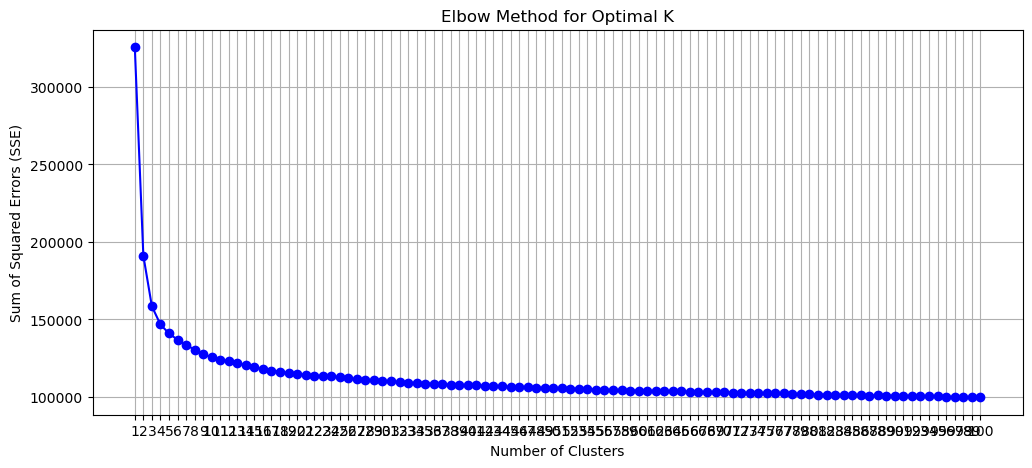

In [150]:
plot_kmeans_elbow(cpu_linear_corr[index])

In [151]:
communities_kmeans=detect_kmeans(cpu_linear_corr[index],6)

In [152]:
kmeans_po=get_top5_from_communities(communities_kmeans,cpu_returns_dataset,labels)

In [153]:
communities_ap=detect_affinity(cpu_linear_corr[index])
ap_po=get_top5_from_communities(communities_ap,cpu_returns_dataset,labels)

In [154]:
print(len(louvain_po))
print(len(leiden_po))
print(len(greedy_po))
print(len(label_po))
print(len(kmeans_po))
print(len(ap_po))

15
15
15
5307
30
1841


In [155]:
cpu_returns_louvain=cpu_returns_dataset.loc[:,louvain_po]
cpu_returns_leiden=cpu_returns_dataset.loc[:,leiden_po]
cpu_returns_greedy=cpu_returns_dataset.loc[:,greedy_po]
cpu_returns_label=cpu_returns_dataset.loc[:,label_po]
cpu_returns_kmeans=cpu_returns_dataset.loc[:,kmeans_po]
cpu_returns_ap=cpu_returns_dataset.loc[:,ap_po]

In [156]:
def diversification_ratio(data):
    
    returns = data
    
    #calculating volatility (standard deviation)
    volatilities = returns.std() * np.sqrt(251)
    
    #calculating covariance of the returns
    cov_matrix = returns.cov() * 252
    
    #Constructing E.W portfolio
    weights = np.ones(len(data.columns)) / len(data.columns)
    
    #Calculating the weighted sum of individual volatilities
    weighted_vol_sum = np.dot(volatilities, weights)
    
    # Computing the portfolio volatility using the covariance matrix
    portfolio_volatility = np.sqrt(np.dot(weights, np.dot(cov_matrix, weights)))
    
    # Calculating the Diversification Ratio
    diversification_ratio = weighted_vol_sum / portfolio_volatility
    
    return diversification_ratio

In [157]:
cpu_returns_louvain.to_csv(os.path.join(os.getcwd(),'Linear','Louvain',f'{year}','louvain'+'linear'+str(year)+'.csv'))
cpu_returns_leiden.to_csv(os.path.join(os.getcwd(),'Linear','Leiden',f'{year}','leiden'+'linear'+str(year)+'.csv'))
cpu_returns_greedy.to_csv(os.path.join(os.getcwd(),'Linear','Greedy',f'{year}','greedy'+'linear'+str(year)+'.csv'))
cpu_returns_label.to_csv(os.path.join(os.getcwd(),'Linear','Label',f'{year}','label'+'linear'+str(year)+'.csv'))
cpu_returns_kmeans.to_csv(os.path.join(os.getcwd(),'Linear','Kmeans',f'{year}','kmeans'+'linear'+str(year)+'.csv'))
cpu_returns_ap.to_csv(os.path.join(os.getcwd(),'Linear','AP',f'{year}','ap'+'linear'+str(year)+'.csv'))

In [158]:
print(f'Louvain {year} {diversification_ratio(cpu_returns_louvain)}')
print(f'Leiden {year} {diversification_ratio(cpu_returns_leiden)}')
print(f'Greedy {year} {diversification_ratio(cpu_returns_greedy)}')
print(f'Label {year} {diversification_ratio(cpu_returns_label)}')
print(f'Kmeans {year} {diversification_ratio(cpu_returns_kmeans)}')
print(f'AP {year} {diversification_ratio(cpu_returns_ap)}')

Louvain 2024 3.001385953547545
Leiden 2024 3.001385953547545
Greedy 2024 2.701509544344261
Label 2024 3.9423600188115913
Kmeans 2024 2.7747338214733035
AP 2024 5.319962185444595
